### adapt from examples: 

https://statics.teams.cdn.office.net/evergreen-assets/safelinks/1/atp-safelinks.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

def change_font_size(size):
    from matplotlib import pylab
    params = {'legend.fontsize': size,
             'axes.labelsize': size,
             'axes.titlesize':size,
             'xtick.labelsize':size,
             'ytick.labelsize':size,
             }
    pylab.rcParams.update(params)
    
    
# %matplotlib ipympl

# Physics related

In [2]:
Pd_K_edge = 24350.3
R_PdPd = 2.77

Equation to calculate wavelength
$k = \sqrt{\frac{2m(E - E_{\text{edge}})}{\hbar^2}} \approx 0.512 \sqrt{E - E_{\text{edge}}}$ [eV]

$ \lambda = \frac{2\pi}{k} =\frac{h}{\sqrt{2m(E - E_{\text{edge}})}} $

$\lambda = \frac{2\pi}{0.512\sqrt{E - E_{\text{edge}}}}$

$\lambda \approx \frac{12.27}{\sqrt{E - E_{\text{edge}}}}$ [$\AA$]

In [3]:
def wavelength_calc(deltaE, printit=True):
    wavelength = 12.27/deltaE
    if printit:
        print(wavelength)
    return wavelength

def wavenumber_calc(deltaE, printit=True):
    wavevector = 0.512 * np.sqrt(deltaE)
    if printit:
        print(wavevector)
    return wavevector

In [4]:
wavelength = wavelength_calc(300)
k = wavenumber_calc(300)

0.0409
8.868100134752654


## Animation 1: Simple sin waves

## 1.1 Static figure at k=3

In [5]:
R_PdPd = 2.77

### Individual figures

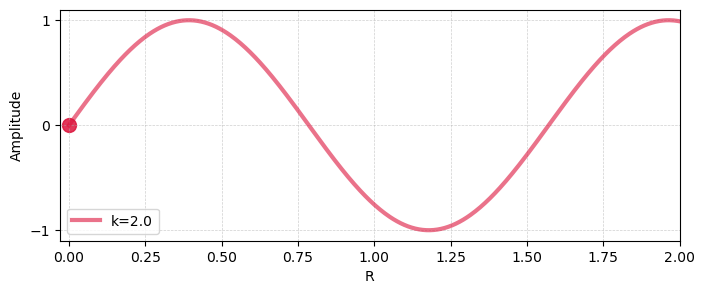

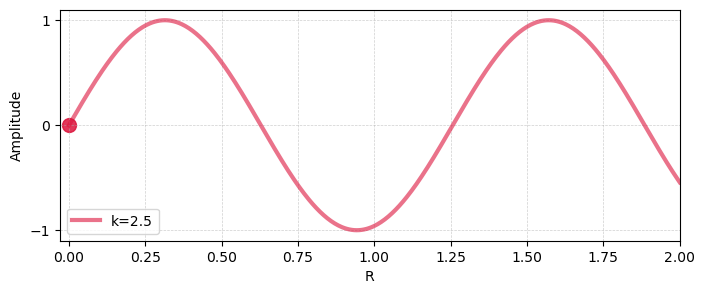

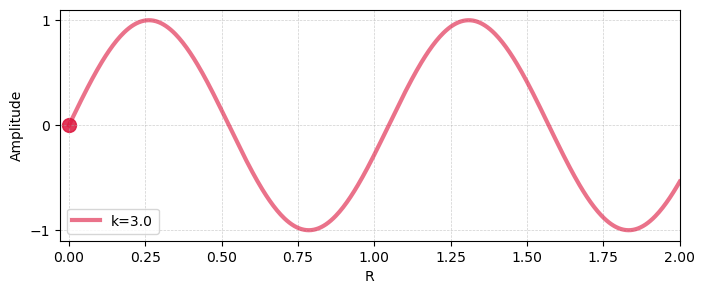

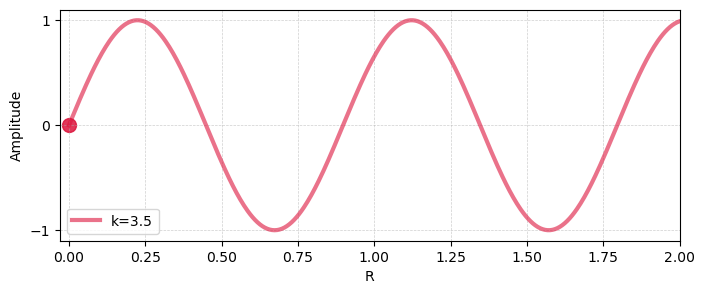

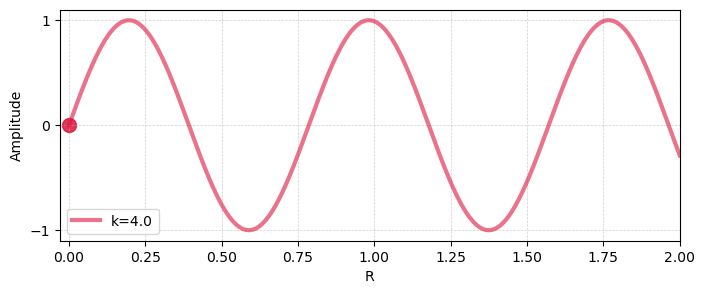

In [36]:
import numpy as np
import matplotlib.pyplot as plt

k_values = np.arange(2, 4.5, 0.5)
R = np.linspace(0, 2, 500)


for k_i in k_values:
    f = lambda R: np.sin(2 * k_i * R)
    y = f(R)
    fig, ax = plt.subplots(figsize=(8, 3))
    wave, = ax.plot(R, y, "-", color="crimson", lw=3, alpha=0.6)
    scatter = ax.scatter([R[0]], [y[0]], color="crimson", s=100, alpha=0.85)
    ax.set_yticks((-1, 0, 1))
    ax.grid(True, which="both", linestyle="--", lw=0.5, alpha=0.6)
    ax.set_xlim(0-0.03, 2)
    ax.set_xlabel('R')
    ax.set_ylabel('Amplitude')
    ax.legend([f"k={k_i}"], loc="lower left")
    plt.savefig(f'01_sine_wave_k_is_{k_i}_2Ris_4.png')


### gradient figure, plotted together

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_89719/3577323725.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', len(k_values)+3)


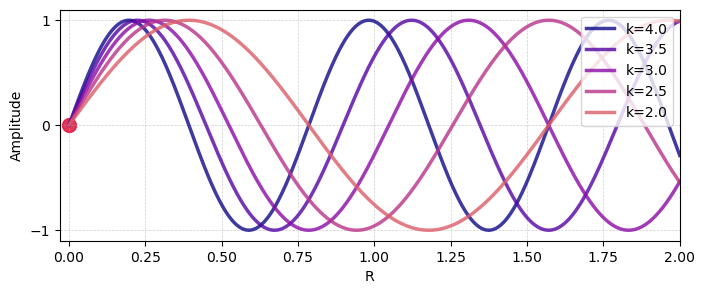

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

k_values = np.arange(2, 4.5, 0.5)
R = np.linspace(0, 2, 500)

fig, ax = plt.subplots(figsize=(8, 3))

cmap = cm.get_cmap('plasma', len(k_values)+3)

for i, k_i in enumerate(k_values[::-1]):
    f = lambda R: np.sin(2 * k_i * R)
    y = f(R)
    ax.plot(R, y, "-", color=cmap(i), lw=2.5, alpha=0.8, label=f"k={k_i}")
scatter = ax.scatter([R[0]], [y[0]], color="crimson", s=100, alpha=0.85)
ax.set_yticks((-1, 0, 1))
ax.grid(True, which="both", linestyle="--", lw=0.5, alpha=0.6)
ax.set_xlim(0-0.03, 2)
ax.set_xlabel('R')
ax.set_ylabel('Amplitude')
ax.legend(loc='upper right')

plt.savefig('all_sine_waves_with_gradients.png')
plt.show()

## Animation 1.2: travelling sin waves

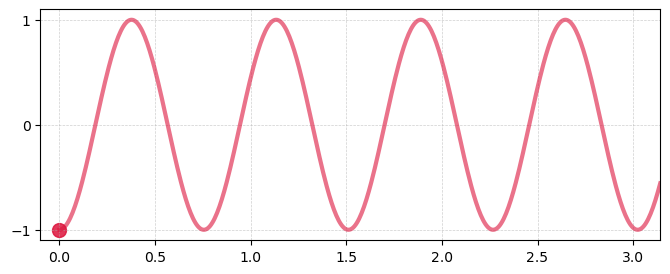

In [20]:
f = lambda x: np.sin(k * R_PdPd * x)
x = np.linspace(0, np.pi, 500)


fig, ax = plt.subplots(figsize=(8, 3))
wave, = ax.plot(x, y, "-", color="crimson", lw=3, alpha = 0.6)

# Initialize the scatter point at the first x position
scatter = ax.scatter([x[0]], [y[0]], color="crimson", s=100, alpha = 0.85)

# ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# ax.set_xticklabels(["Center atom", None, None, None, "Neighbor atom"])

ax.set_yticks((-1, 0, 1))
ax.grid(True, which="both", linestyle="--", lw=0.5, alpha=0.6)
ax.set_xlim(0-0.1, np.pi)

def shift(t, c=0):
    # Update the y data of the sine wave
    new_y = f(x - c*t)
    wave.set_ydata(new_y)
    
    # Calculate the new position for the scatter point
    new_x = x[0] - c*t
    new_y_scatter = f(new_x)
    scatter.set_offsets([x[0], new_y_scatter])
    
    return wave, scatter  # Return both the line and the scatter

ani = anim.FuncAnimation(fig, shift, frames=190, 
                         fargs=(0.025,),
                         interval=30, blit=True)

# Save animation
ani.save('01_sine_wave_animation.gif', writer='pillow', fps=30)

# Animation 2: sin waves changing frequency

## Animation 2.1 standard XAFS

In [20]:
Pd_standard = np.loadtxt('Pd_foil_standard_example_XANES_EXAFS/Pd_K_standard.dat.nor')
Pd_R = np.loadtxt('Pd_foil_standard_example_XANES_EXAFS/marked.chir_mag')
Pd_K = np.loadtxt('Pd_foil_standard_example_XANES_EXAFS/marked.chik2')

fit = np.loadtxt('Pd_foil_standard_example_XANES_EXAFS/Pd_K_standard.dat.rmag')
fit_k = np.loadtxt('Pd_foil_standard_example_XANES_EXAFS/Pd_K_standard.dat.k2')

## constant

190


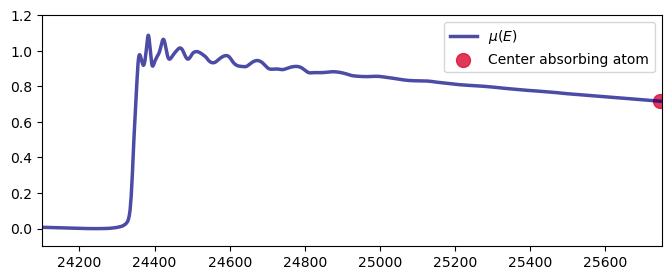

In [37]:
fig = plt.figure(figsize=(8,3))
# change_font_size(10)
# Interpolate the spectrum to evenly spaced energies
x_interpolated = np.linspace(24360, 25750, 570)
y_interpolated = np.interp(x_interpolated, Pd_standard[:, 0], Pd_standard[:, 1])

plt.plot(Pd_standard[:, 0], Pd_standard[:, 1], color='navy', linewidth=2.5, alpha=0.7)
# plt.plot(x_interpolated, y_interpolated, color='navy', linewidth=2.5, alpha=0.7)
scatter = plt.scatter(x_interpolated[0], y_interpolated[0], color="crimson", s=100, alpha=0.85)

plt.ylim(-0.1, 1.2)
plt.xlim(24100, 25750)
plt.legend(['$\mu(E)$', 'Center absorbing atom'])

def shift(t):
    new_x = x_interpolated[t]
    new_y = y_interpolated[t]
    scatter.set_offsets([new_x, new_y])
    # deltaE = new_x - Pd_K_edge
    # print("time", t)
    # print("deltaE", deltaE)
    return scatter, 

# Set up the animation
frames = np.arange(0, len(x_interpolated), 3)
print(len(frames))
ani = anim.FuncAnimation(fig, shift, frames=frames,
                         interval=30, blit=True)

# Save the animation to a GIF
ani.save('02_spectrum_animation.gif', writer='pillow', fps=30)

## Animation 2.2 sin waves changing 

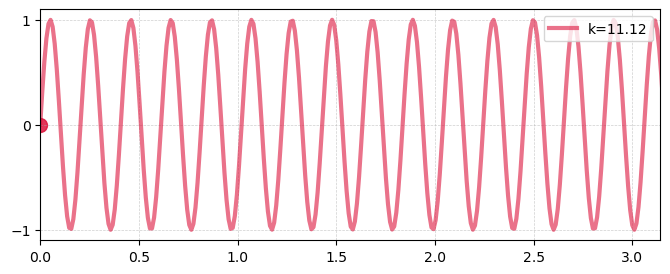

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

# Define the sine function with time-dependent frequency
f = lambda x, t, k=1: np.sin(k * R_PdPd * x)

x = np.linspace(-np.pi, np.pi, 300)
x = np.linspace(0, np.pi*2, 600)

y = f(x, 0)

fig, ax = plt.subplots(figsize=(8, 3))
wave, = ax.plot(x, y, "-", color="crimson", lw=3, alpha=0.6)

# Initialize the scatter point at the first x position
scatter = ax.scatter([x[0]], [y[0]], color="crimson", s=100, alpha=0.85)

# ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
# ax.set_xticklabels(["Center atom", None, None, None, "Neighbor atom"])


ax.set_yticks((-1, 0, 1))
ax.grid(True, which="both", linestyle="--", lw=0.5, alpha=0.6)
# ax.set_xlim(-np.pi-0.1, np.pi)
ax.set_xlim(0, np.pi)

# Initialize the legend with a placeholder text
legend = ax.legend([f"k={1}"], loc="upper right")

def shift(t, c=1):
    # Time-dependent frequency
    DeltaE = x_interpolated[t] - Pd_K_edge
    current_k = wavenumber_calc(DeltaE, printit=False)
    
    # Update the y data of the sine wave with changing frequency
    new_y = f(x, t, k=current_k)
    wave.set_ydata(new_y)
    
    # Update the scatter point
    new_x = x[0]
    new_y_scatter = new_y[0]
    scatter.set_offsets([new_x, new_y_scatter])
    
    # Update the legend with the current k value
    ax.legend([f"k={current_k:.2f}"], loc="upper right")
    
    return wave, scatter  # Return both the line and the scatter

ani = anim.FuncAnimation(fig, shift, frames=190, 
                         fargs=(0.1,),
                         interval=30, blit=True)

# Save the animation to a GIF
ani.save('02_sine_wave_animation_with_changing_frequency.gif', writer='pillow', fps=30)

### K_range not used for now

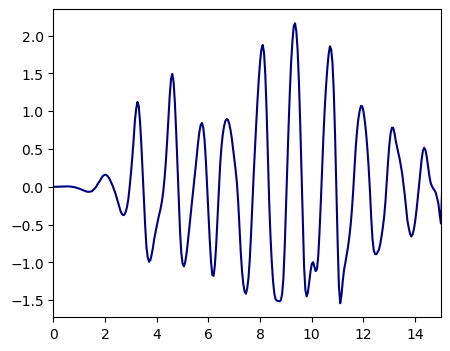

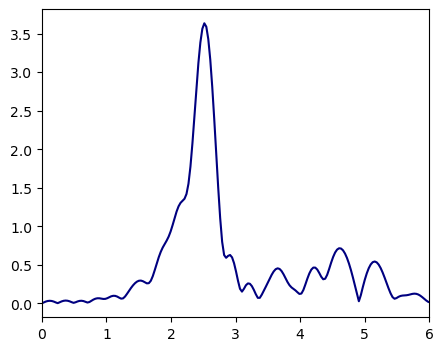

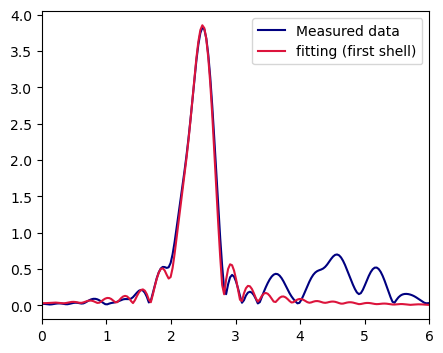

In [13]:
plt.figure(figsize = (5,4))
plt.plot(Pd_K[:,0], Pd_K[:,2], color = 'navy')

#plt.ylim(-0.1, 1.2)
plt.xlim(0,15)

#plt.xlabel('X-ray Energy [eV]')
plt.savefig('Pd_K.jpg', dpi = 300)

#%%
plt.figure(figsize = (5,4))
plt.plot(Pd_R[:,0], Pd_R[:,1], color = 'navy')


#plt.ylim(-0.1, 1.2)
plt.xlim(0,6)

#plt.xlabel('X-ray Energy [eV]')
plt.savefig('Pd_R.jpg', dpi = 300)

#%%

plt.figure(figsize = (5,4))
plt.plot(fit[:,0], fit[:,1]/10., color = 'navy')

plt.plot(fit[:,0], fit[:,2]/10., color = 'crimson')

#plt.ylim(-0.1, 1.2)
plt.xlim(0,6)
plt.legend(['Measured data', 'fitting (first shell)'])
#plt.xlabel('X-ray Energy [eV]')
plt.savefig('fit_R.jpg', dpi = 300)

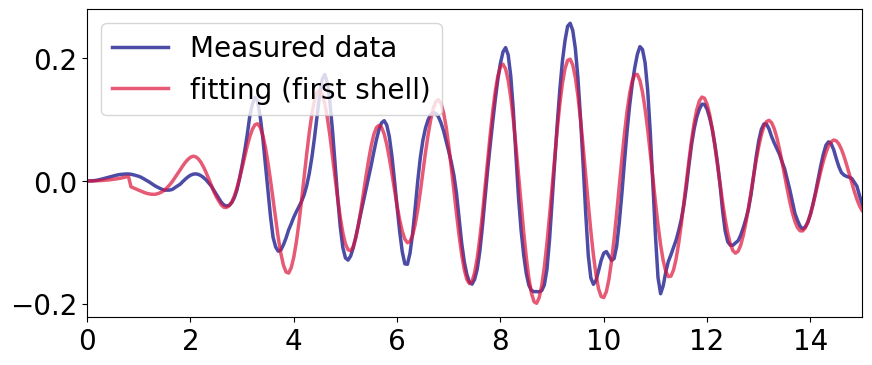

In [13]:
#%%

plt.figure(figsize = (10,4))
plt.plot(fit_k[:,0], fit_k[:,1]/10., color = 'navy', **para)

plt.plot(fit_k[:,0], fit_k[:,2]/10., color = 'crimson', **para)

#plt.ylim(-0.1, 1.2)
plt.xlim(0,15)
plt.legend(['Measured data', 'fitting (first shell)'])
#plt.xlabel('X-ray Energy [eV]')
plt.savefig('fit_K.jpg', dpi = 300)

# Animation 3: both abs atom and neighbor atom

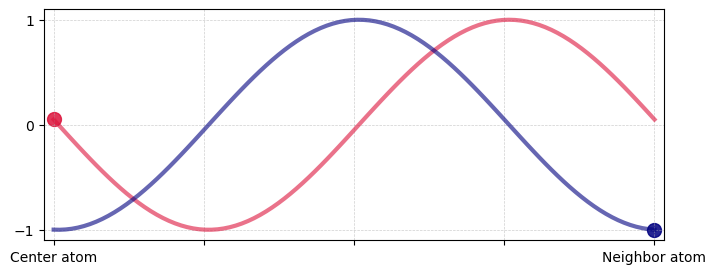

In [17]:
f = lambda x: np.sin(x)
x = np.linspace(-np.pi, np.pi, 100)
y = f(x)

fig, ax = plt.subplots(figsize=(8, 3))
wave, = ax.plot(x, y, "-", color="crimson", lw=3, alpha = 0.6)

# neighbor wave
f2 = lambda x: np.sin(x + np.pi/2)
y2 = f2(x)
wave2, = ax.plot(x, y2, "-", color="navy", lw=3, alpha = 0.6)

# Initialize the scatter point at the first x position
scatter = ax.scatter([x[0]], [y[0]], color="crimson", s=100, alpha = 0.85)
scatter2 = ax.scatter([x[-1]], [y2[-1]], color="navy", s=100, alpha = 0.85)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["Center atom", None, None, None, "Neighbor atom"])

ax.set_yticks((-1, 0, 1))
ax.grid(True, which="both", linestyle="--", lw=0.5, alpha=0.6)
ax.set_xlim(-np.pi-0.1, np.pi+0.1)

def shift(t, c=1):
    # Update the y data of the sine wave
    new_y = f(x - c*t)
    wave.set_ydata(new_y)
    
    # Calculate the new position for the scatter point
    new_x = x[0] - c*t
    new_y_scatter = f(new_x)
    scatter.set_offsets([x[0], new_y_scatter])

    # neighbor wave
    new_y2 = f2(x - c*t)
    wave2.set_ydata(new_y2)
    
    new_x2 = x[-1] - c*t
    new_y_scatter2 = f2(new_x2)
    scatter2.set_offsets([x[-1], new_y_scatter2])

    return wave, wave2, scatter, scatter2

ani = anim.FuncAnimation(fig, shift, frames=190, 
                         fargs=(0.1,),
                         interval=30, blit=True)

# Save animation
ani.save('03_sine_wave_animation.gif', writer='pillow', fps=30)

## making sum

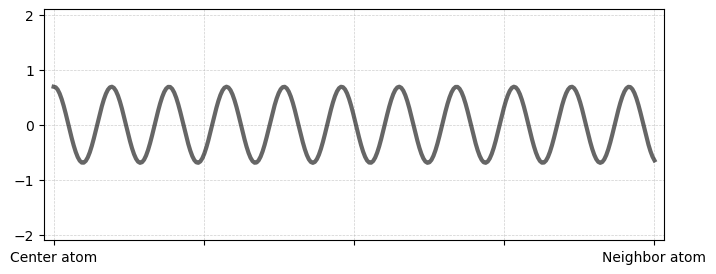

In [43]:
x = np.linspace(-np.pi, np.pi, 300)
y = f(x, 0)
y2 = f2(x, 0)

fig, ax = plt.subplots(figsize=(8, 3))
sum_y = y + y2
wavesum, = ax.plot(x, sum_y, "-", color="k", lw=3, alpha=0.6)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["Center atom", None, None, None, "Neighbor atom"])
ax.set_yticks((-2,-1, 0, 1,2))
ax.grid(True, which="both", linestyle="--", lw=0.5, alpha=0.6)
ax.set_xlim(-np.pi-0.1, np.pi+0.1)
ax.set_ylim(-2.1, 2.1)

scatter = ax.scatter([x[0]], [sum_y[0]], color="navy", s=100, alpha=0.85)

def shift(t, c=1):
    # Time-dependent frequency (if required)
    current_freq = 1.0 + 0.05 * t  # Example of a changing frequency
    
    # Update the y data of the sine wave
    new_y = f(x, t, base_freq=current_freq)
    new_y2 = f2(x, t, base_freq=current_freq)
    new_sum = new_y + new_y2
    wavesum.set_ydata(new_sum)
    
    # Calculate the new position for the scatter point
    new_x = x[0] - c*t
    new_y_scatter = f(new_x, t, base_freq=current_freq)
    new_y_scatter2 = f2(new_x, t, base_freq=current_freq)
    
    scatter.set_offsets([new_x, new_y_scatter + new_y_scatter2])

    return wavesum, scatter

ani = anim.FuncAnimation(fig, shift, frames=190, 
                         interval=30, blit=True)

# Save animation
ani.save('03_sum.gif', writer='pillow', fps=30)

# Animation 4: changing freq for both abs and neighbor atoms

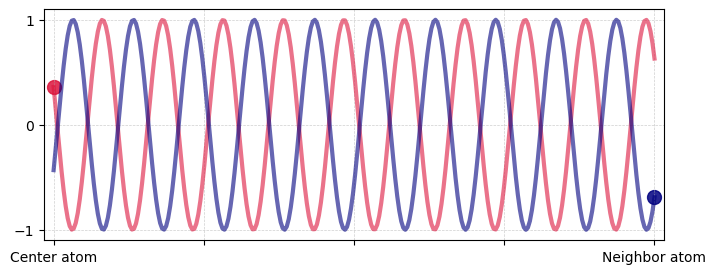

In [30]:
# Define the sine function with time-dependent frequency
f = lambda x, t, base_freq=1: np.sin(base_freq * (x - t))

x = np.linspace(-np.pi, np.pi, 300)
y = f(x, 0)

fig, ax = plt.subplots(figsize=(8, 3))
wave, = ax.plot(x, y, "-", color="crimson", lw=3, alpha=0.6)

# Neighbor wave
f2 = lambda x, t, base_freq=1: np.sin(base_freq * (x - t + np.pi/2))
y2 = f2(x, 0)
wave2, = ax.plot(x, y2, "-", color="navy", lw=3, alpha=0.6)

# Initialize the scatter point at the first x position
scatter = ax.scatter([x[0]], [y[0]], color="crimson", s=100, alpha=0.85)
scatter2 = ax.scatter([x[-1]], [y2[-1]], color="navy", s=100, alpha=0.85)

ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["Center atom", None, None, None, "Neighbor atom"])

ax.set_yticks((-1, 0, 1))
ax.grid(True, which="both", linestyle="--", lw=0.5, alpha=0.6)
ax.set_xlim(-np.pi-0.1, np.pi+0.1)

def shift(t, c=1):
    # Time-dependent frequency
    current_freq = 0.5 + 0.05 * t  # Adjust this multiplier to change how quickly the frequency changes
    
    # Update the y data of the sine wave with changing frequency
    new_y = f(x, t=1, base_freq=current_freq)
    wave.set_ydata(new_y)
    
    # Calculate the new position for the first scatter point
    new_x = x[0]
    new_y_scatter = new_y[0]
    scatter.set_offsets([new_x, new_y_scatter])
    
    # Neighbor wave
    new_y2 = f2(x, t=1, base_freq=current_freq)
    wave2.set_ydata(new_y2)
    
    # Calculate the new position for the second scatter point
    new_x2 = x[-1]
    new_y_scatter2 = new_y2[-1]
    scatter2.set_offsets([new_x2, new_y_scatter2])

    return wave, wave2, scatter, scatter2


ani = anim.FuncAnimation(fig, shift, frames=190, 
                         interval=30, blit=True)

# Save the animation to a GIF
ani.save('04_sine_wave_animation_with_changing_frequency.gif', writer='pillow', fps=30)

## making sum

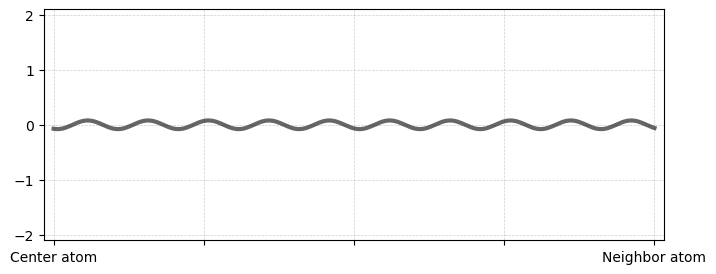

In [46]:
fig, ax = plt.subplots(figsize=(8, 3))
sum_y = y + y2
wavesum, = ax.plot(x, sum_y, "-", color="black", lw=3, alpha=0.6)


ax.set_xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax.set_xticklabels(["Center atom", None, None, None, "Neighbor atom"])
ax.set_yticks((-2,-1, 0, 1,2))
ax.grid(True, which="both", linestyle="--", lw=0.5, alpha=0.6)
ax.set_xlim(-np.pi-0.1, np.pi+0.1)
ax.set_ylim(-2.1, 2.1)


def shift(t, c=1):
    # Time-dependent frequency
    current_freq = 0.5 + 0.05 * t  
    new_y = f(x, t=1, base_freq=current_freq)
    
    # Neighbor wave
    new_y2 = f2(x, t=1, base_freq=current_freq)
    
    # sum
    new_sum = new_y + new_y2
    wavesum.set_ydata(new_sum)

    return wave, wave2, scatter, scatter2

ani = anim.FuncAnimation(fig, shift, frames=190, 
                         interval=30, blit=True)

# Save animation
ani.save('04_sum.gif', writer='pillow', fps=30)